In [14]:
import pandas as pd
import random
import os

# Define the folder and CSV path
folder_path = r"C:\Users\Moses Kiprono\Desktop\Myprojects\aws ticketing"
csv_path = os.path.join(folder_path, "tickets.csv")

# Ensure folder exists
os.makedirs(folder_path, exist_ok=True)

# Auto-generate tickets.csv if missing
if not os.path.exists(csv_path):
    print("tickets.csv not found. Generating 50 sample tickets...")
    messages = [
        "I can't log into my account.",
        "Please refund my last payment.",
        "I love your service!",
        "App keeps crashing.",
        "How do I change my subscription?",
        "Thanks for the support!",
        "Cannot access my dashboard.",
        "My payment failed, need help.",
        "I want to cancel my subscription.",
        "The app is very slow today."
    ]
    tickets = pd.DataFrame({
        "customer_message": [random.choice(messages) for _ in range(50)]
    })
    tickets.to_csv(csv_path, index=False)
    print(f"Sample tickets.csv created at {csv_path}")

# Load tickets
tickets_df = pd.read_csv(csv_path)
print("Tickets loaded successfully!")
tickets_df.head()


Tickets loaded successfully!


,customer_message
0,I love your service!
1,Thanks for the support!
2,I love your service!
3,The app is very slow today.
4,I can't log into my account.


In [16]:
import random

# Predefined responses for categories
responses = {
    "Technical": [
        "Please reset your password using the reset link.",
        "Try logging out and back in, this often resolves the issue.",
        "Ensure your app is updated to the latest version.",
        "Follow the steps in our help center to fix this issue."
    ],
    "Billing": [
        "Please verify your payment details or contact support.",
        "Your subscription charge has been adjusted, check your account.",
        "Refund requests can be submitted via your order page.",
        "Ensure your billing info is up-to-date to avoid issues."
    ],
    "Support": [
        "We are looking into your issue. Support will contact you soon.",
        "Please provide more details so we can help you faster.",
        "Your request has been received, and we're on it.",
        "Check our FAQ section; your answer might be there."
    ],
    "Feedback": [
        "Thank you for your feedback!",
        "We appreciate your input and will consider it.",
        "Thanks! Your suggestions help us improve.",
        "We love hearing from our users!"
    ]
}

def process_ticket(ticket_message):
    text = ticket_message.lower()
    if any(word in text for word in ["password", "log in", "login", "app crash", "cannot access"]):
        category = "Technical"
        priority = "High"
    elif any(word in text for word in ["payment", "charge", "refund", "billing", "subscription"]):
        category = "Billing"
        priority = "High"
    elif any(word in text for word in ["cancel", "change plan", "address update"]):
        category = "Billing"
        priority = "Medium"
    elif any(word in text for word in ["love", "great", "awesome", "thank you"]):
        category = "Feedback"
        priority = "Low"
    else:
        category = "Support"
        priority = "Medium"

    suggested_response = random.choice(responses[category])
    return {
        "category": category,
        "priority": priority,
        "suggested_response": suggested_response
    }

# Process all tickets
results = tickets_df["customer_message"].apply(process_ticket)
tickets_df["category"] = results.apply(lambda x: x["category"])
tickets_df["priority"] = results.apply(lambda x: x["priority"])
tickets_df["suggested_response"] = results.apply(lambda x: x["suggested_response"])

# Save processed tickets
processed_csv_path = os.path.join(folder_path, "tickets_processed.csv")
tickets_df.to_csv(processed_csv_path, index=False)
print(f"Tickets processed and saved at {processed_csv_path}")
tickets_df.head()


Tickets processed and saved at C:\Users\Moses Kiprono\Desktop\Myprojects\aws ticketing\tickets_processed.csv


,customer_message,category,priority,suggested_response
0,I love your service!,Feedback,Low,Thank you for your feedback!
1,Thanks for the support!,Support,Medium,We are looking into your issue. Support will c...
2,I love your service!,Feedback,Low,Thanks! Your suggestions help us improve.
3,The app is very slow today.,Support,Medium,"Your request has been received, and we're on it."
4,I can't log into my account.,Technical,High,Ensure your app is updated to the latest version.


In [10]:
# --- Cell 1: Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# --- Cell 2: Define Advanced Mock AI Agent ---
# Predefined responses for realism
responses = {
    "Technical": [
        "Please reset your password using the reset link.",
        "Try logging out and back in, this often resolves the issue.",
        "Ensure your app is updated to the latest version.",
        "Follow the steps in our help center to fix this issue."
    ],
    "Billing": [
        "Please verify your payment details or contact support.",
        "Your subscription charge has been adjusted, check your account.",
        "Refund requests can be submitted via your order page.",
        "Ensure your billing info is up-to-date to avoid issues."
    ],
    "Support": [
        "We are looking into your issue. Support will contact you soon.",
        "Please provide more details so we can help you faster.",
        "Your request has been received, and we're on it.",
        "Check our FAQ section; your answer might be there."
    ],
    "Feedback": [
        "Thank you for your feedback!",
        "We appreciate your input and will consider it.",
        "Thanks! Your suggestions help us improve.",
        "We love hearing from our users!"
    ]
}

def process_ticket(ticket_message):
    """
    Advanced mock AI agent for ticket processing.
    Returns category, priority, and a suggested response.
    """
    text = ticket_message.lower()
    
    # Determine category
    if any(word in text for word in ["password", "log in", "login", "app crash", "cannot access"]):
        category = "Technical"
        priority = "High"
    elif any(word in text for word in ["payment", "charge", "refund", "billing", "subscription"]):
        category = "Billing"
        priority = "High"
    elif any(word in text for word in ["cancel", "change plan", "address update"]):
        category = "Billing"
        priority = "Medium"
    elif any(word in text for word in ["love", "great", "awesome", "thank you"]):
        category = "Feedback"
        priority = "Low"
    else:
        category = "Support"
        priority = "Medium"
    
    # Pick a random suggested response from category
    suggested_response = random.choice(responses[category])
    
    return {
        "category": category,
        "priority": priority,
        "suggested_response": suggested_response
    }

# --- Cell 3: Load tickets CSV ---
tickets_df = pd.read_csv("aws ticketing/ticketing.csv")

print("Tickets loaded:")
display(tickets_df.head())

# --- Cell 4: Process tickets ---
results = tickets_df["customer_message"].apply(process_ticket)
tickets_df["category"] = results.apply(lambda x: x["category"])
tickets_df["priority"] = results.apply(lambda x: x["priority"])
tickets_df["suggested_response"] = results.apply(lambda x: x["suggested_response"])

# Save processed tickets
tickets_df.to_csv("tickets_processed.csv", index=False)
print("Tickets processed! Saved to tickets_processed.csv")
display(tickets_df.head())

# --- Cell 5: Analytics - Tickets by Category ---
plt.figure(figsize=(8,5))
sns.countplot(x="category", data=tickets_df)
plt.title("Tickets by Category")
plt.show()

# --- Cell 6: Analytics - Tickets by Priority ---
plt.figure(figsize=(8,5))
sns.countplot(x="priority", data=tickets_df)
plt.title("Tickets by Priority")
plt.show()

# --- Cell 7: Sample High-Priority Tickets ---
high_priority = tickets_df[tickets_df["priority"] == "High"]
print("High Priority Tickets:")
display(high_priority)


FileNotFoundError: [Errno 2] No such file or directory: 'aws ticketing/ticketing.csv'

C:\Users\Moses Kiprono\AppData\Local\Temp\ipykernel_31232\1842413532.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tickets_df, x="category", order=tickets_df['category'].value_counts().index, palette="Set2")


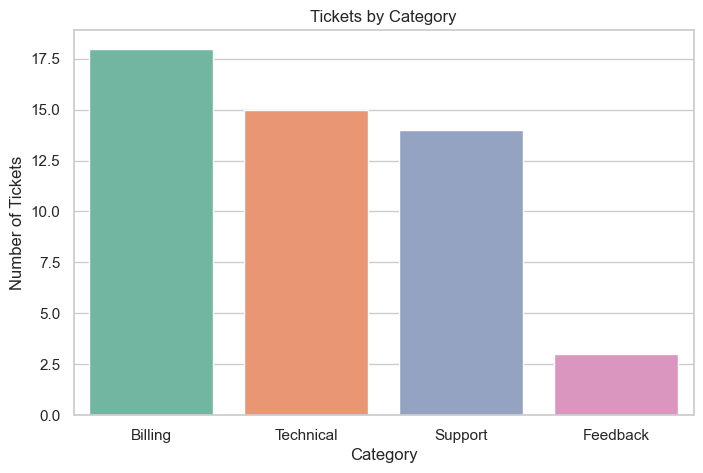

C:\Users\Moses Kiprono\AppData\Local\Temp\ipykernel_31232\1842413532.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tickets_df, x="priority", order=["High", "Medium", "Low"], palette="Set1")


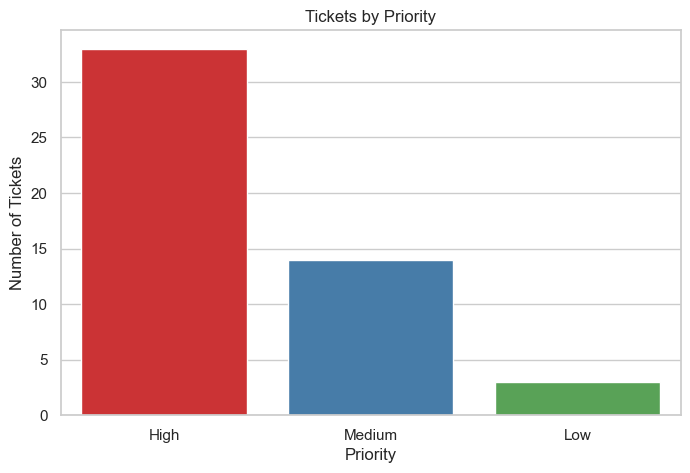

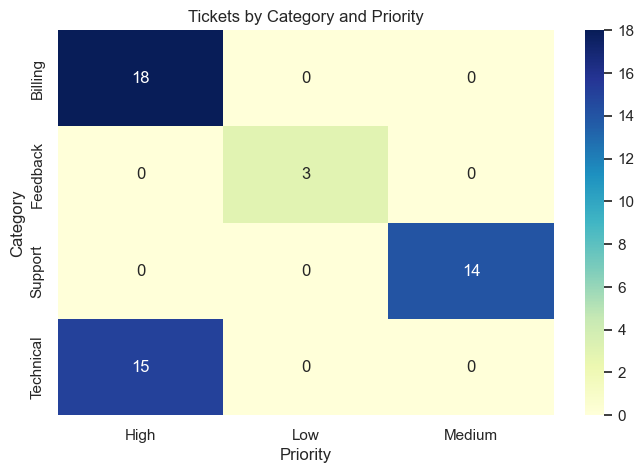

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style
sns.set(style="whitegrid")

# --- 1️⃣ Tickets by Category ---
plt.figure(figsize=(8,5))
sns.countplot(data=tickets_df, x="category", order=tickets_df['category'].value_counts().index, palette="Set2")
plt.title("Tickets by Category")
plt.xlabel("Category")
plt.ylabel("Number of Tickets")
plt.show()

# --- 2️⃣ Tickets by Priority ---
plt.figure(figsize=(8,5))
sns.countplot(data=tickets_df, x="priority", order=["High", "Medium", "Low"], palette="Set1")
plt.title("Tickets by Priority")
plt.xlabel("Priority")
plt.ylabel("Number of Tickets")
plt.show()

# --- 3️⃣ Optional: Category vs Priority Heatmap ---
category_priority_counts = tickets_df.groupby(["category", "priority"]).size().unstack(fill_value=0)
plt.figure(figsize=(8,5))
sns.heatmap(category_priority_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Tickets by Category and Priority")
plt.xlabel("Priority")
plt.ylabel("Category")
plt.show()


In [18]:
# Filter high-priority tickets
high_priority_tickets = tickets_df[tickets_df["priority"] == "High"]

print(f"High-priority tickets ({len(high_priority_tickets)}):")
high_priority_tickets[["customer_message", "category", "suggested_response"]].head(10)


High-priority tickets (33):


,customer_message,category,suggested_response
4,I can't log into my account.,Technical,Ensure your app is updated to the latest version.
5,I can't log into my account.,Technical,Please reset your password using the reset link.
6,I want to cancel my subscription.,Billing,"Your subscription charge has been adjusted, ch..."
7,I want to cancel my subscription.,Billing,Please verify your payment details or contact ...
8,I can't log into my account.,Technical,Ensure your app is updated to the latest version.
9,I can't log into my account.,Technical,"Try logging out and back in, this often resolv..."
11,Cannot access my dashboard.,Technical,Ensure your app is updated to the latest version.
12,I want to cancel my subscription.,Billing,Refund requests can be submitted via your orde...
13,I want to cancel my subscription.,Billing,Ensure your billing info is up-to-date to avoi...
14,Cannot access my dashboard.,Technical,Ensure your app is updated to the latest version.


In [19]:
# --- Automatic Agent Response Simulation ---

def generate_agent_response(ticket):
    """
    Generate a ready-to-send response based on the ticket's category and suggested response.
    """
    response = f"""
    Hello,

    Thank you for contacting support regarding your issue:
    "{ticket['customer_message']}"

    Our team has categorized this ticket as: {ticket['category']}
    Priority level: {ticket['priority']}

    Suggested solution:
    {ticket['suggested_response']}

    Best regards,
    Support Team
    """
    return response.strip()

# Apply automatic response generation
tickets_df["agent_response"] = tickets_df.apply(generate_agent_response, axis=1)

# Save the final tickets with agent responses
final_csv_path = os.path.join(folder_path, "tickets_with_responses.csv")
tickets_df.to_csv(final_csv_path, index=False)

print(f"Tickets with agent responses saved at {final_csv_path}")

# Display the first 3 tickets with responses
for idx, row in tickets_df.head(3).iterrows():
    print(f"\n--- Ticket {idx+1} ---")
    print(row["agent_response"])


Tickets with agent responses saved at C:\Users\Moses Kiprono\Desktop\Myprojects\aws ticketing\tickets_with_responses.csv

--- Ticket 1 ---
Hello,

    Thank you for contacting support regarding your issue:
    "I love your service!"

    Our team has categorized this ticket as: Feedback
    Priority level: Low

    Suggested solution:
    Thank you for your feedback!

    Best regards,
    Support Team

--- Ticket 2 ---
Hello,

    Thank you for contacting support regarding your issue:
    "Thanks for the support!"

    Our team has categorized this ticket as: Support
    Priority level: Medium

    Suggested solution:
    We are looking into your issue. Support will contact you soon.

    Best regards,
    Support Team

--- Ticket 3 ---
Hello,

    Thank you for contacting support regarding your issue:
    "I love your service!"

    Our team has categorized this ticket as: Feedback
    Priority level: Low

    Suggested solution:
    Thanks! Your suggestions help us improve.

    Bes

In [21]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Add a column to track resolution status
if "resolved" not in tickets_df.columns:
    tickets_df["resolved"] = False

# Dropdown filters
category_dropdown = widgets.Dropdown(
    options=["All"] + tickets_df["category"].unique().tolist(),
    description="Category:"
)

priority_dropdown = widgets.Dropdown(
    options=["All"] + tickets_df["priority"].unique().tolist(),
    description="Priority:"
)

# Output area to display tickets
output = widgets.Output()

def mark_resolved(idx):
    tickets_df.at[idx, "resolved"] = True
    show_tickets()

def show_tickets(change=None):
    clear_output(wait=True)
    
    # Filter tickets
    filtered = tickets_df.copy()
    if category_dropdown.value != "All":
        filtered = filtered[filtered["category"] == category_dropdown.value]
    if priority_dropdown.value != "All":
        filtered = filtered[filtered["priority"] == priority_dropdown.value]
    
    # Display tickets
    with output:
        if filtered.empty:
            print("No tickets found for selected filters.")
        else:
            for idx, row in filtered.iterrows():
                if row["resolved"]:
                    status = "✅ Resolved"
                else:
                    status = "❌ Unresolved"
                print(f"--- Ticket {idx+1} | {status} ---")
                print(f"Message: {row['customer_message']}")
                print(f"Category: {row['category']} | Priority: {row['priority']}")
                print(f"Agent Response:\n{row['agent_response']}")
                
                # Add Mark as Resolved button if not resolved
                if not row["resolved"]:
                    btn = widgets.Button(description="Mark as Resolved", button_style='success')
                    btn.on_click(lambda b, i=idx: mark_resolved(i))
                    display(btn)
                print("-"*50)

# Button to export unresolved tickets
def export_unresolved(b):
    unresolved = tickets_df[~tickets_df["resolved"]]
    export_path = os.path.join(folder_path, "tickets_unresolved.csv")
    unresolved.to_csv(export_path, index=False)
    print(f"Unresolved tickets exported to {export_path}")

export_btn = widgets.Button(description="Export Unresolved Tickets", button_style='info')
export_btn.on_click(export_unresolved)

# Link dropdowns to update display
category_dropdown.observe(show_tickets, names='value')
priority_dropdown.observe(show_tickets, names='value')

# Display everything
display(category_dropdown, priority_dropdown, export_btn, output)

# Initial display
show_tickets()


Dropdown(description='Category:', options=('All', 'Feedback', 'Support', 'Technical', 'Billing'), value='All')

Dropdown(description='Priority:', options=('All', 'Low', 'Medium', 'High'), value='All')

Button(button_style='info', description='Export Unresolved Tickets', style=ButtonStyle())

Output()